# Import Library and Data

In [ ]:
# Standard library
import pandas as pd
import numpy as np
import scipy.stats as scs
import joblib

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Modeling Library
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import pickle


In [ ]:
data = pd.read_csv('/content/merged_data_energy_pluto.csv', index_col=0) # change data path
#data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9101 entries, 0 to 9257
Data columns (total 75 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   property_id                                                                                                   9101 non-null   float64
 1   nyc_borough_block_and_lot_bbl                                                                                 9101 non-null   int64  
 2   city                                                                                                          9101 non-null   object 
 3   postal_code                                                                                                   9101 non-null   float64
 4   national_median_reference_property_type                    

TARGET = 'site_energy_use_(kbtu)'

In [ ]:
#data.columns

In [ ]:
# Exclude values
data = data[data['site_energy_use_kbtu'] != 0]

In [ ]:
# Define predictor and target variables
predictor = [
       'borough',
       'largest_property_use_type__gross_floor_area_ft²', 'year_built',
       'number_of_buildings',
       'occupancy',
       'energy_star_score',
       'national_median_energy_star_score',
       'energy_star_certification__eligibility',
       'percent_of_electricity_that_is_green_power',
       'number_of_active_energy_meters__total',
       'multifamily_housing__government_subsidized_housing',
       'multifamily_housing__gross_floor_area_ft²',
       'multifamily_housing__number_of_bedrooms',
       'multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_laundry_hookups_in_all_units',
       'multifamily_housing__number_of_laundry_hookups_in_common_areas',
       'multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories',
       'multifamily_housing__total_number_of_residential_living_units',
       'multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stories',
       'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft',
       'multifamily_housing__percent_that_can_be_cooled',
       'multifamily_housing__percent_that_can_be_heated',
       'zonedist1', 'bldgclass', 'landuse', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'ext', 'proxcode',
       'lottype', 'assessland', 'assesstot', 'builtfar',
]

potential_feature_leakage = [
    'site_eui_kbtuft²',
    'weather_normalized_site_energy_use_kbtu',
    'weather_normalized_site_electricity_intensity_kwhft²',
    'source_eui_kbtuft²', 'weather_normalized_source_eui_kbtuft²',
    'national_median_source_eui_kbtuft²', 'source_energy_use_kbtu',
    'weather_normalized_source_energy_use_kbtu',
    'electricity_use__grid_purchase_kbtu',
    'electricity_use__grid_purchase_kwh',
    'weather_normalized_site_electricity_kwh'
]

target = ['site_energy_use_kbtu']

In [ ]:
# Change data types (since we still have some categorical data in numerical form)
for feature in ['proxcode', 'lottype', 'landuse']:
  data[feature] = data[feature].astype(str)

# Split Data

In [ ]:
# Split to X y
X = data[predictor]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#X_train.info()

# Preprocessing (Transform, Scaling, One Hot Encoding)

In [ ]:
# Printing all categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print("Categorical columns:")
for category_column in categorical_features:
    print(f'- {category_column}')

Categorical columns:
- borough
- zonedist1
- bldgclass
- landuse
- ext
- proxcode
- lottype


In [ ]:
# Printing all numerical columns
numerical_features = X_train.select_dtypes(include=['number']).columns.to_list()

print("Categorical columns:")
for num_column in numerical_features:
    print(f'- {num_column}')

Categorical columns:
- largest_property_use_type__gross_floor_area_ft²
- year_built
- number_of_buildings
- occupancy
- energy_star_score
- national_median_energy_star_score
- percent_of_electricity_that_is_green_power
- number_of_active_energy_meters__total
- multifamily_housing__gross_floor_area_ft²
- multifamily_housing__number_of_bedrooms
- multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft
- multifamily_housing__number_of_laundry_hookups_in_all_units
- multifamily_housing__number_of_laundry_hookups_in_common_areas
- multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories
- multifamily_housing__total_number_of_residential_living_units
- multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft
- multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft
- multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stor

In [ ]:
# Make pipeline for categorical features
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Corrected name
])

# Make pipeline for numerical features
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # Corrected name
])

# Assuming 'categorical_features' and 'numerical_features' are lists of column names
# Column Transformer
transformer = ColumnTransformer([
    ('cat_pipe', cat_transformer, categorical_features),
    ('num_pipe', num_transformer, numerical_features)],
    remainder='passthrough'
)

In [ ]:
# Define model pipeline
rf = RandomForestRegressor(random_state=42)
modelpipe = Pipeline([
    ('transformer', transformer),
    ('regressor', rf)
])

In [ ]:
modelpipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['borough', 'zonedist1', 'bldgclass', 'landuse', 'ext', 'proxcode',
       'lottype'],
      dtype='object')),
                                                 ('num_pipe',
                                                  Pipelin...
                                                   'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft',
                                                   'multifamily_housing__percent_that_can_be_cooled',
                                                   'multifamily_housing__percent_that_can_be_heated',
                                                   'lotarea', 'bldgarea',
                                                   'comarea', 'resarea',
                                                   'officearea', 'retailarea',
                                                   'garagearea', 'strgearea',
                                                   'factryarea', ...])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Fit, Cross-Validation, and Evaluation

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 420 to 7398
Data columns (total 46 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   borough                                                                                                       6369 non-null   object 
 1   largest_property_use_type__gross_floor_area_ft²                                                               6369 non-null   float64
 2   year_built                                                                                                    6369 non-null   float64
 3   number_of_buildings                                                                                           6369 non-null   float64
 4   occupancy                                                

In [ ]:
# Fit the model pipeline
modelpipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['borough', 'zonedist1', 'bldgclass', 'landuse', 'ext', 'proxcode',
       'lottype'],
      dtype='object')),
                                                 ('num_pipe',
                                                  Pipelin...
                                                   'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft',
                                                   'multifamily_housing__percent_that_can_be_cooled',
                                                   'multifamily_housing__percent_that_can_be_heated',
                                                   'lotarea', 'bldgarea',
                                                   'comarea', 'resarea',
                                                   'officearea', 'retailarea',
                                                   'garagearea', 'strgearea',
                                                   'factryarea', ...])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Cross validation
skfold = KFold(n_splits=5, random_state=2023, shuffle=True)
score = cross_val_score(modelpipe, X_train, y_train, cv=skfold, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_percentage_error')
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


array([-0.15063727, -0.12814026, -0.13626268, -0.14642427, -0.45498963])

<Axes: >

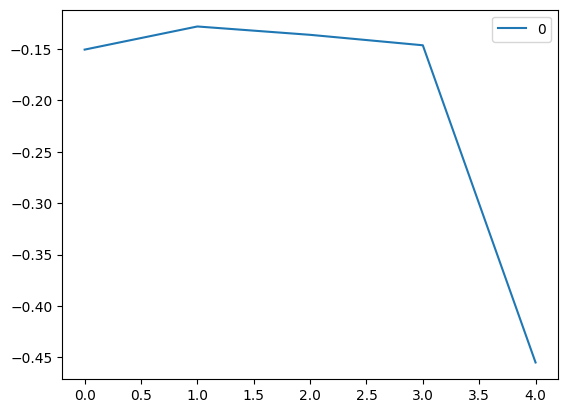

In [ ]:
# Plot result
df_score = pd.DataFrame(score)
sns.lineplot(data=pd.DataFrame(df_score))

In [ ]:
# Fit and predict
modelpipe.fit(X_train, y_train)
y_train_pred = modelpipe.predict(X_train)
y_test_pred = modelpipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
# Evaluate the model using training data
mse_train = mse(y_train, y_train_pred)
mae_train = mae(y_train, y_train_pred)
mape_train = mape(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print('RMSE:', rmse_train, '\nMSE:', mse_train, '\nMAE:', mae_train, '\nMAPE:', mape_train)

RMSE: 1656558.6454947598 
MSE: 2744186545963.4336 
MAE: 412092.1298572976 
MAPE: 0.07018640899634437


In [ ]:
# Evaluate the model using test data
mse_test = mse(y_test, y_test_pred)
mae_test = mae(y_test, y_test_pred)
mape_test = mape(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print('RMSE:', rmse_test, '\nMSE:', mse_test, '\nMAE:', mae_test, '\nMAPE:', mape_test)

RMSE: 3462548.188512537 
MSE: 11989239957771.451 
MAE: 1037131.2422075518 
MAPE: 0.2863305241584235


# Feature Selection

# Hyperparameter Tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


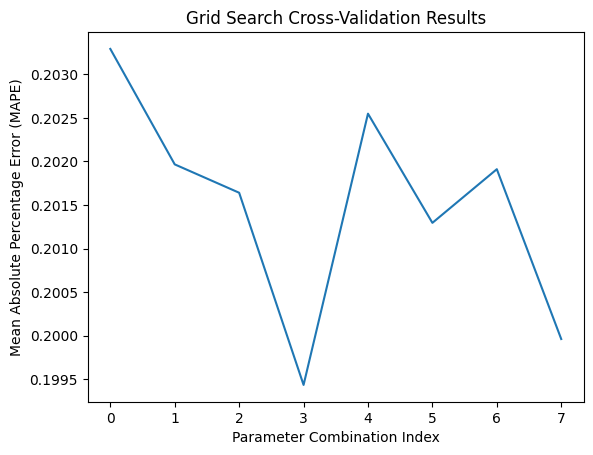

In [ ]:
param_grid = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [None, 20],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__min_samples_split': [2]
}

# Setup and execute GridSearchCV
grid_search = GridSearchCV(modelpipe, param_grid, cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                           scoring='neg_mean_absolute_percentage_error', n_jobs=-1, verbose=1).fit(X_train, y_train)

# Extract and plot cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['mean_test_score'] = -cv_results['mean_test_score']  # Convert scores to positive MAPE
sns.lineplot(data=cv_results, x=cv_results.index, y='mean_test_score')
plt.title('Grid Search Cross-Validation Results')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.show()

# Fit and predict using the best model found by GridSearchCV
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Print the best parameters and the performance of the model
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV score: {grid_search.best_score_}')

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Best CV score: -0.19943441078242036


In [ ]:
# Evaluate the model using training data
mse_train = mse(y_train, y_train_pred)
mae_train = mae(y_train, y_train_pred)
mape_train = mape(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print('RMSE:', rmse_train, '\nMSE:', mse_train, '\nMAE:', mae_train, '\nMAPE:', mape_train)

RMSE: 2551453.36536019 
MSE: 6509914275607.839 
MAE: 476917.44022270566 
MAPE: 0.08035343419671165


In [ ]:
# Evaluate the model using test data
mse_test = mse(y_test, y_test_pred)
mae_test = mae(y_test, y_test_pred)
mape_test = mape(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print('RMSE:', rmse_test, '\nMSE:', mse_test, '\nMAE:', mae_test, '\nMAPE:', mape_test)

RMSE: 3418313.2834775527 
MSE: 11684865703999.088 
MAE: 1029211.5037693492 
MAPE: 0.2803431495197676
